In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [9]:
# Creación de datos manualmente y convertir a tabla
datos = {"capital": list(range(10,110,10)), "beneficio": list(range(100,1100,100))}
df=pd.DataFrame(datos)
df

,capital,beneficio
0,10,100
1,20,200
2,30,300
3,40,400
4,50,500
5,60,600
6,70,700
7,80,800
8,90,900
9,100,1000


Text(0.5, 1.0, 'Beneficio según capital')

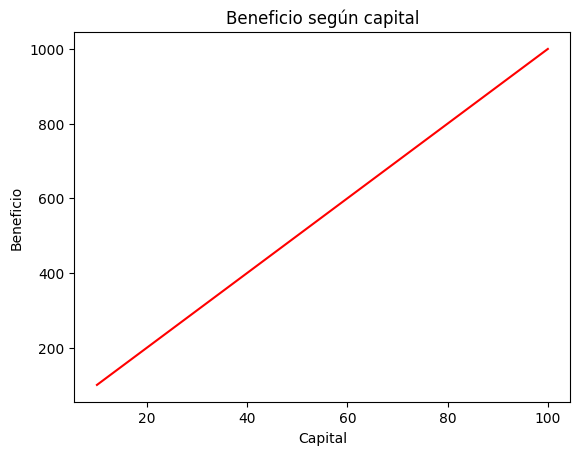

In [22]:
# Representación gráfica de los datos
plt.plot(df["capital"], df["beneficio"], "r-")
plt.xlabel("Capital")
plt.ylabel("Beneficio")
plt.title("Beneficio según capital")

In [34]:
# Partición de datos en variable de entrada (input) y variable de salida (output)
x_train= df["capital"]
y_train=df["beneficio"]
print(f"{x_train.name} - {y_train.name}")

capital - beneficio


In [35]:
# Instanciamos el modelo Deep Learning
model = tf.keras.Sequential()

In [38]:
# Configuramos los parámetros 1 neurona y 1 variable de entrada (input)
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Definimos el optimizador y el formato de la pérdida
model.compile(optimizer=tf.keras.optimizers.Adam(1), loss="mean_squared_error")

In [52]:
# Añadimos las variables al modelo e indicamos las "épocas"
epochs_hist = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 363ms/step - loss: 16.2327
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 3742.8789
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 214.3340
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 914.4256
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 2222.2090
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 1582.9192
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 404.3157
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 22.7875
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 549.7100
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 1083.7606
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 978.4608
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 447.0702
Epoch 13/100
1/1 [=============

In [53]:
# Identificamos la clave del diccionario para representación gráfica
epochs_hist.history.keys()

dict_keys(['loss'])

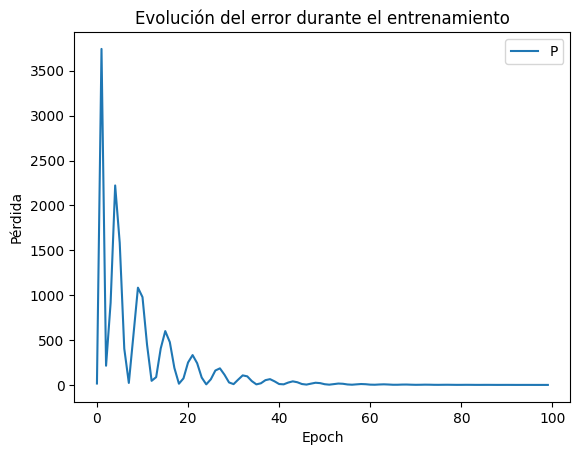

In [54]:
# Representación gráfica del error
plt.plot(epochs_hist.history['loss'])
plt.title("Evolución del error durante el entrenamiento")
plt.xlabel("Epoch")
plt.ylabel("Pérdida")
plt.legend("Pérdida entrenamiento")

In [55]:
# Mostramos el peso del modelo
model.get_weights()

[array([[9.981633]], dtype=float32), array([1.4931765], dtype=float32)]

In [88]:
# Calculamos error de la predicción
capital = 55
beneficio = model.predict([capital])
print(beneficio)

1/1 [==============================] - 0s 144ms/step
[[550.483]]


In [89]:
# Mostramos error por pantalla
print(f"Error: {((beneficio-(capital*10))/(capital*10))}")

Error: [[0.00087813]]


In [90]:
# Calculamos error porcentual
beneficio_esperado = capital*10
error_predict= (beneficio-beneficio_esperado)/beneficio_esperado
print(error_predict[0][0]*100,"%")

0.08781294454820454 %


Text(0.5, 1.0, 'Beneficio para Preddicción Capital = 55')

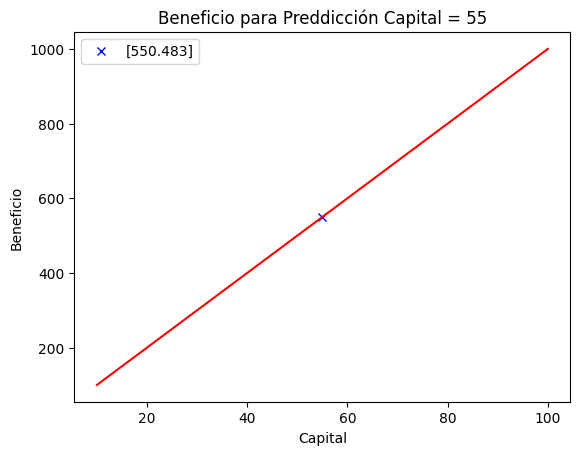

In [121]:
# Representación gráfica de la predicción sobre el histórico original
plt.plot(capital, beneficio, "bx")
plt.plot(df["capital"], df["beneficio"], "r-")
plt.xlabel("Capital")
plt.ylabel("Beneficio")
plt.legend(beneficio)
plt.title("Beneficio para Preddicción Capital = {}".format(capital))